In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


In [2]:
# import matplotlib.pylab as pylab

# params = {'axes.labelsize': 'x-large',
#           'xtick.labelsize': 'x-large',
#           'ytick.labelsize': 'x-large',
#           'axes.titlesize': 'x-large',
#           'legend.fontsize': 'x-large'}
# pylab.rcParams.update(params)

In [3]:
kwargs = dict(
    header=0, 
    usecols=['Step','Value'], 
    index_col='Step',
)

In [4]:
df = pd.read_csv('ATLA initial success eval 1-9-21.csv', **kwargs)
df.columns = ['1_9_21_Evaluation_Reward']

In [5]:
df = df.merge(pd.read_csv('ATLA initial success train 1-9-21.csv', **kwargs),
         left_index=True,
         right_index=True,
         how='outer',
         ).rename(columns={'Value':'1_9_21_Training_Mean_Episode_Reward'})

In [6]:
# df = pd.concat([df,pd.read_csv('ATLA initial success train 1-9-21.csv', **kwargs)]
#                ).sort_index().rename(columns={'Value':'1_9_21_Training_Mean_Episode_Reward'})

plot.line won't connect points separated by many nan like our evalues, we can interpolate or change the style so the isolated dots are visible

<Axes: xlabel='Step'>

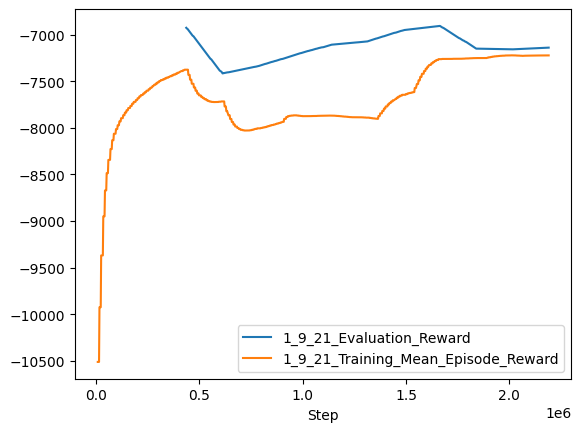

In [7]:
df.interpolate(method='linear').plot.line()

<Axes: title={'center': 'ATLA Training and Evaluation Rewards for Varied Hyperparameters'}, xlabel='Step', ylabel='Reward'>

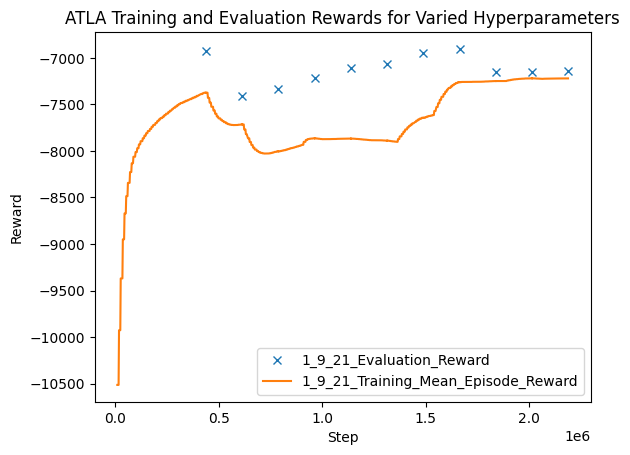

In [8]:
df.plot.line(style=['x','-'],
             ylabel='Reward',
             title='ATLA Training and Evaluation Rewards for Varied Hyperparameters')

Note the agent is evaluated at the end of each alternation, we see the evals match the mean training episode rewards by the end

ATLA KPIs of 1 train 1-11-14_0.csv is the adv again, not the agent

In [9]:
df.index.max()

2189750

In [10]:
df_load = pd.read_csv('ATLA KPIs of 1 train 1-11-14_0.csv', **kwargs)
idx_offset = df_load.index.min()
df_load.set_index(df_load.index-idx_offset, inplace=True)
df = df.merge(df_load.interpolate(method='cubic'),
         left_index=True,
         right_index=True,
         how='outer',
         ).rename(columns={'Value':'1_11_14_Training_Mean_Episode_Reward'})

In [11]:
df_load = pd.read_csv('ATLA KPIs of 1 eval 1-11-14_0.csv', **kwargs)
#df_load.set_index(df_load.index-df_load.index.min(), inplace=True)
df_load.set_index(df_load.index-idx_offset, inplace=True) #use offeset from training
df = df.merge(df_load.interpolate(method='cubic'),
         left_index=True,
         right_index=True,
         how='outer',
         ).rename(columns={'Value':'1_11_14_Evaluation_Reward'})

fill blanks in training rewards, that are filled with NaNs during the merge

In [12]:
mask = df.columns[df.columns.str.contains('Episode')]
df[mask] = df[mask].interpolate(method='cubic')

<Axes: title={'center': 'ATLA Training and Evaluation Rewards for Varied Hyperparameters'}, xlabel='Step', ylabel='Reward'>

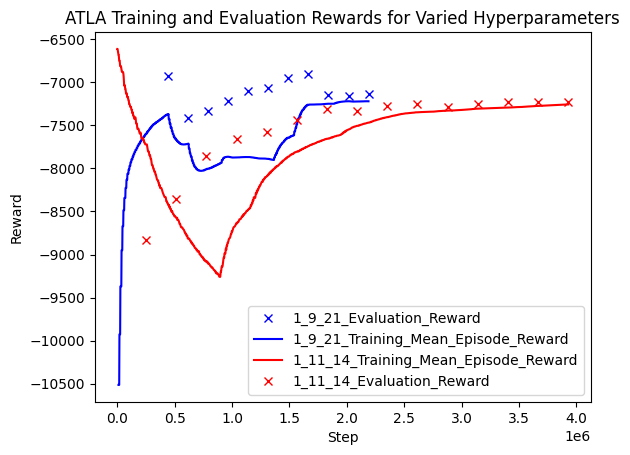

In [13]:
df.plot.line(style=['bx','b-','r-','rx'],
             ylabel='Reward',
             title='ATLA Training and Evaluation Rewards for Varied Hyperparameters')

In [14]:
df_load = pd.read_csv(r'ATLA too large adv action train  1-12-21.csv', **kwargs) #This is the wrong graph
idx_offset = df_load.index.min()
df_load.set_index(df_load.index-idx_offset, inplace=True)
df = df.merge(df_load.interpolate(method='cubic'),
         left_index=True,
         right_index=True,
         how='outer',
         ).rename(columns={'Value':'1-12-21_Training_Mean_Episode_Reward'})
df_load = pd.read_csv(r'ATLA too large adv action 1-12-21.csv', **kwargs)
df_load.set_index(df_load.index-idx_offset, inplace=True)
df = df.merge(df_load.interpolate(method='cubic'),
         left_index=True,
         right_index=True,
         how='outer',
         ).rename(columns={'Value':'1-12-21_Evaluation_Reward'})

<Axes: title={'center': 'ATLA Training and Evaluation Rewards for Varied Hyperparameters'}, xlabel='Step', ylabel='Reward'>

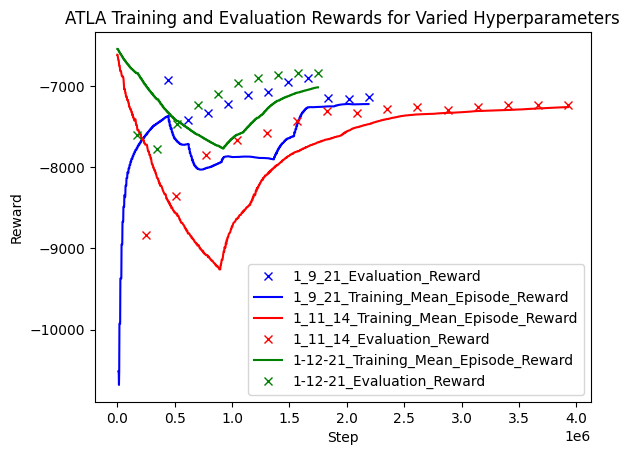

In [15]:
mask = df.columns[df.columns.str.contains('Episode')] #interpolate training trace, not evals which are discrete
df[mask] = df[mask].interpolate(method='cubic')
df.plot.line(style=['bx','b-','r-','rx','g-','gx'],
             ylabel='Reward',
             title='ATLA Training and Evaluation Rewards for Varied Hyperparameters')

In [16]:
df_load = pd.read_csv(r'ATLA too small adv action train 1-14-15.csv', **kwargs)
idx_offset = df_load.index.min()
df_load.set_index(df_load.index-idx_offset, inplace=True)
df = df.merge(df_load.interpolate(method='cubic'),
         left_index=True,
         right_index=True,
         how='outer',
         ).rename(columns={'Value':'1-14-15_Training_Mean_Episode_Reward'})
df_load = pd.read_csv(r'ATLA too small adv action 1-14-15.csv', **kwargs)
df_load.set_index(df_load.index-idx_offset, inplace=True)
df = df.merge(df_load.interpolate(method='cubic'),
         left_index=True,
         right_index=True,
         how='outer',
         ).rename(columns={'Value':'1-14-15_Evaluation_Reward'})

<Axes: title={'center': 'ATLA Training and Evaluation Rewards for Varied Hyperparameters'}, xlabel='Step', ylabel='Reward'>

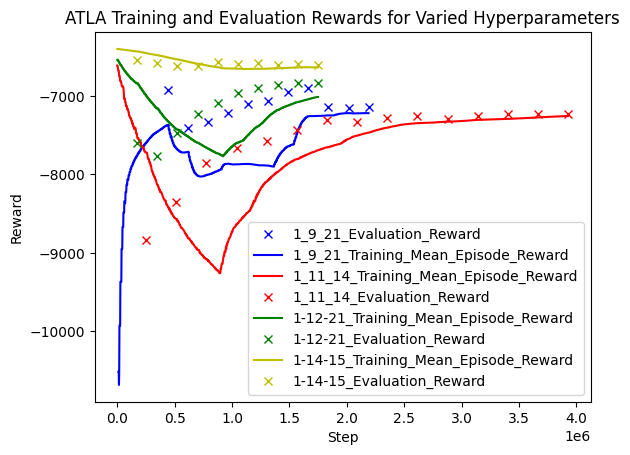

In [17]:
mask = df.columns[df.columns.str.contains('Episode')] #interpolate training trace, not evals which are discrete
df[mask] = df[mask].interpolate(method='cubic')
df.plot.line(style=['bx','b-','r-','rx','g-','gx','y-','yx'],
             ylabel='Reward',
             title='ATLA Training and Evaluation Rewards for Varied Hyperparameters')

In [18]:
df_load = pd.read_csv(r'ATLA_PPO agent 100 alts over 0+500 train 1-17-21.csv', **kwargs) 
idx_offset = df_load.index.min()
df_load.set_index(df_load.index-idx_offset, inplace=True)
df = df.merge(df_load.interpolate(method='cubic'),
         left_index=True,
         right_index=True,
         how='outer',
         ).rename(columns={'Value':'1-17-21_Training_Mean_Episode_Reward'})
df_load = pd.read_csv(r'ATLA_PPO agent 100 alts over 0+500 1-17-21.csv', **kwargs)
df_load.set_index(df_load.index-idx_offset, inplace=True)
df = df.merge(df_load.interpolate(method='cubic'),
         left_index=True,
         right_index=True,
         how='outer',
         ).rename(columns={'Value':'1-17-21_Evaluation_Reward'})

<Axes: title={'center': 'ATLA Training and Evaluation Rewards for Varied Hyperparameters'}, xlabel='Step', ylabel='Reward'>

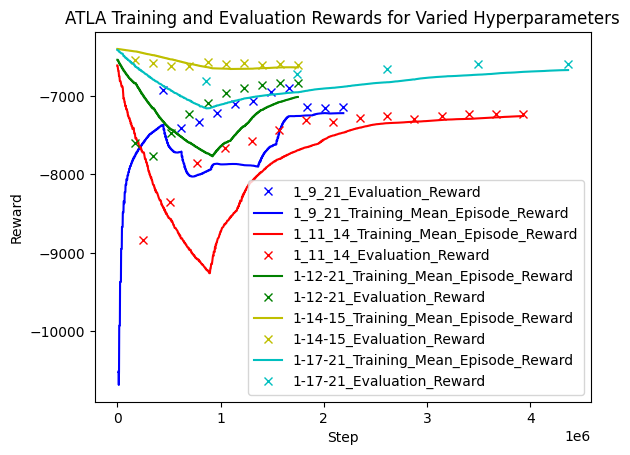

In [19]:
mask = df.columns[df.columns.str.contains('Episode')] #interpolate training trace, not evals which are discrete
df[mask] = df[mask].interpolate(method='cubic')
df.plot.line(style=['bx','b-','r-','rx','g-','gx','y-','yx','c-','cx'],
             ylabel='Reward',
             title='ATLA Training and Evaluation Rewards for Varied Hyperparameters')

In [20]:
df_load = pd.read_csv(r'ATLA best start train 1-30-15_0.csv', **kwargs) 
idx_offset = df_load.index.min()
df_load.set_index(df_load.index-idx_offset, inplace=True)
df = df.merge(df_load.interpolate(method='cubic'),
         left_index=True,
         right_index=True,
         how='outer',
         ).rename(columns={'Value':'1-30-15_Training_Mean_Episode_Reward'})
df_load = pd.read_csv(r'ATLA best start eval 1-30-15_0.csv', **kwargs)
df_load.set_index(df_load.index-idx_offset, inplace=True)
df = df.merge(df_load.interpolate(method='cubic'),
         left_index=True,
         right_index=True,
         how='outer',
         ).rename(columns={'Value':'1-30-15_Evaluation_Reward'})

<Axes: title={'center': 'ATLA Training and Evaluation Rewards for Varied Hyperparameters'}, xlabel='Step', ylabel='Reward'>

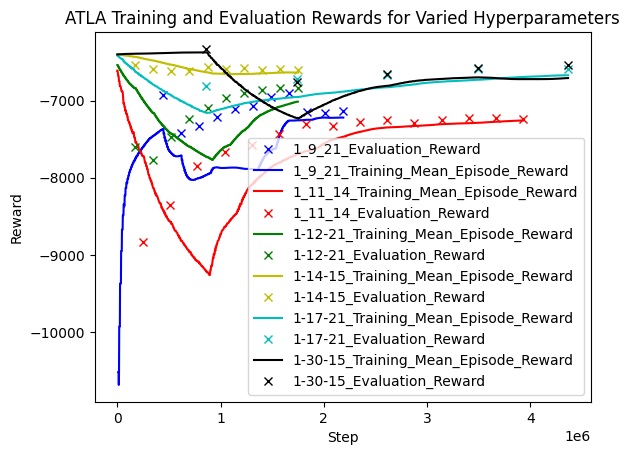

In [21]:
mask = df.columns[df.columns.str.contains('Episode')] #interpolate training trace, not evals which are discrete
df[mask] = df[mask].interpolate(method='cubic')
df.plot.line(style=['bx','b-','r-','rx','g-','gx','y-','yx','c-','cx','k-','kx'],
             ylabel='Reward',
             title='ATLA Training and Evaluation Rewards for Varied Hyperparameters')

In [22]:
df.index.max()

4367212

In [23]:
max_idx = df.index.max()
df_load = pd.read_csv(r'ATLA best train 2-3-21_0.csv', **kwargs)
idx_offset = df_load.index.min()
df_load.set_index(df_load.index - idx_offset + max_idx, inplace=True) 
df = df.merge(df_load.interpolate(method='cubic'),
         left_index=True,
         right_index=True,
         how='outer',
         ).rename(columns={'Value':'2-3-21_Training_Mean_Episode_Reward'})
df_load = pd.read_csv(r'ATLA best eval 2-3-21_0.csv', **kwargs)
df_load.set_index(df_load.index - idx_offset + max_idx, inplace=True)
df = df.merge(df_load.interpolate(method='cubic'),
         left_index=True,
         right_index=True,
         how='outer',
         ).rename(columns={'Value':'2-3-21_Evaluation_Reward'})

<Axes: title={'center': 'ATLA Training and Evaluation Rewards for Varied Hyperparameters'}, xlabel='Step', ylabel='Reward'>

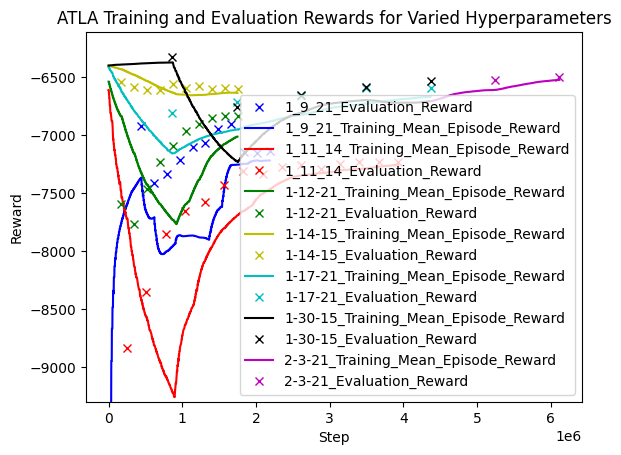

In [24]:
df['2-3-21_Training_Mean_Episode_Reward'] = df['2-3-21_Training_Mean_Episode_Reward'].interpolate(method='cubic') #raises error with continued training...
df.plot.line(style=['bx','b-','r-','rx','g-','gx','y-','yx','c-','cx','k-','kx','m-','mx'],
             ylabel='Reward',
             title='ATLA Training and Evaluation Rewards for Varied Hyperparameters',
             ylim=-9300)

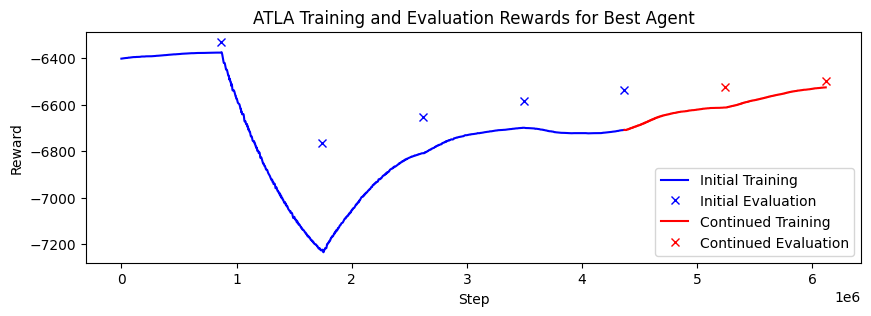

In [25]:
best_mask = df.columns[df.columns.str.contains('1-30-15|2-3-21')]
ax = df[best_mask].plot.line(style=['b-','bx','r-','rx'],
                             ylabel='Reward',
                             title='ATLA Training and Evaluation Rewards for Best Agent',
                             figsize=(10,3))
ax.legend(['Initial Training','Initial Evaluation','Continued Training','Continued Evaluation',])

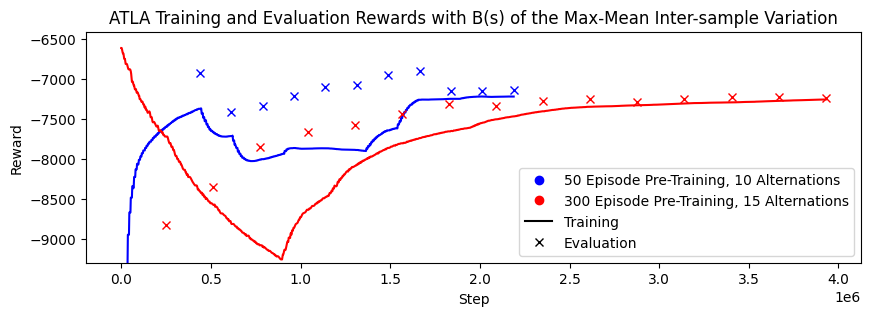

In [26]:
mask = df.columns[df.columns.str.contains('1_9_21|1_11_14')]
ax = df[mask].plot.line(style=['bx','b-','r-','rx'],
                             ylabel='Reward',
                             title='ATLA Training and Evaluation Rewards with B(s) of the Max-Mean Inter-sample Variation',
                             figsize=(10,3),
                             ylim=-9300)
#custom legend
blue_line = mlines.Line2D([], [], color='blue', marker='o',linestyle='None', markersize=6, label='50 Episode Pre-Training, 10 Alternations')
red_line = mlines.Line2D([], [], color='red', marker='o',linestyle='None', markersize=6, label='300 Episode Pre-Training, 15 Alternations')
line = mlines.Line2D([], [], color='black', marker='', markersize=15, label='Training')
x_marker = mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=6, label='Evaluation')

ax.legend(#['_nolegend_']*4,
          handles=[blue_line, red_line, line, x_marker])

20 Eps agent recovered original performance through ATLA, but it's performance was to low. With 300 episodes the agent learned to effectively take no action. Note that for 300 a pretrained agent was used, while the blue shows the 20 episodes of pre-training

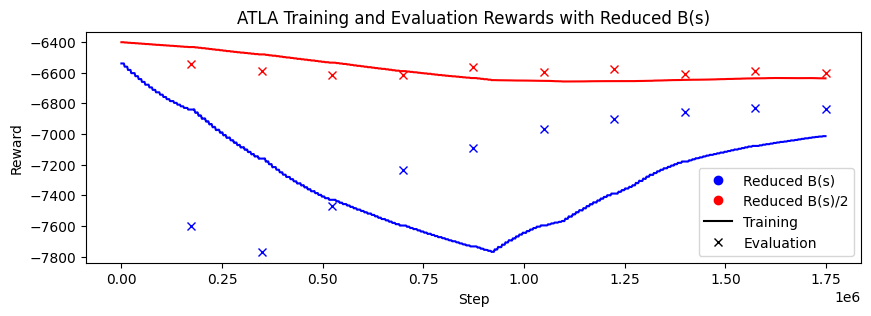

In [27]:
mask = df.columns[df.columns.str.contains('1-12-21|1-14-15')]
ax = df[mask].plot.line(style=['b-','bx','r-','rx'],
                             ylabel='Reward',
                             title='ATLA Training and Evaluation Rewards with Reduced B(s)',
                             figsize=(10,3))
#custom legend
blue_line = mlines.Line2D([], [], color='blue', marker='o',linestyle='None', markersize=6, label='Reduced B(s)')
red_line = mlines.Line2D([], [], color='red', marker='o',linestyle='None', markersize=6, label='Reduced B(s)/2')
line = mlines.Line2D([], [], color='black', marker='', markersize=15, label='Training')
x_marker = mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=6, label='Evaluation')

ax.legend(#['_nolegend_']*4,
          handles=[blue_line, red_line, line, x_marker],
          #bbox_to_anchor=(0.7, 0.4)
          )

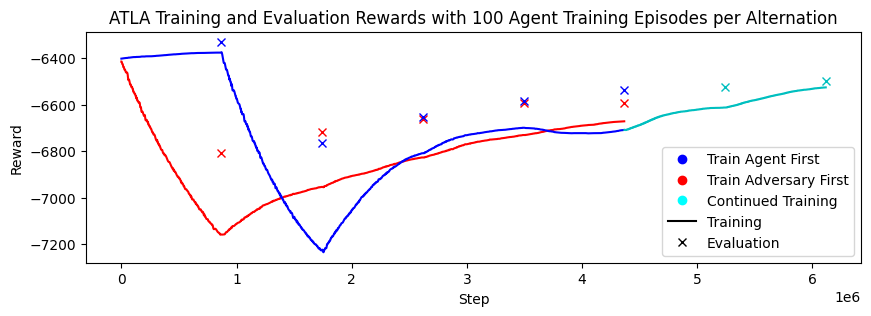

In [29]:
mask = df.columns[df.columns.str.contains('1-17-21|1-30-15|2-3-21')]
ax = df[mask].plot.line(style=['r-','rx','b-','bx','c-','cx'],
                             ylabel='Reward',
                             title='ATLA Training and Evaluation Rewards with 100 Agent Training Episodes per Alternation',
                             figsize=(10,3))
#custom legend
blue_line = mlines.Line2D([], [], color='blue', marker='o',linestyle='None', markersize=6, label='Train Agent First')
red_line = mlines.Line2D([], [], color='red', marker='o',linestyle='None', markersize=6, label='Train Adversary First')
cyan_dot = mlines.Line2D([], [], color='cyan', marker='o',linestyle='None', markersize=6, label='Continued Training')
line = mlines.Line2D([], [], color='black', marker='', markersize=15, label='Training')
x_marker = mlines.Line2D([], [], color='black', marker='x', linestyle='None', markersize=6, label='Evaluation')

ax.legend(handles=[blue_line, red_line, cyan_dot, line, x_marker],
          #bbox_to_anchor=(0.7, 0.4)
          )